<img align="right" src="images/tf-small.png" width="90"/>
<img align="right" src="images/etcbc.png" width="100"/>

# MiMi
## A Deterministic Coreference Resolver for Biblical Hebrew

MiMi is a deterministic -- meaning 'rule driven' -- coreference resolver for Biblical Hebrew. MiMi is the concatenation of Mi Mi in Biblical Hebrew, which means 'Who? Who?' MiMi is used as a tool to identify and analyse participants or entities in a text. MiMi has two phases: mention detection and coreference resolution. The aim was to build a near perfect mention detection phase and a modular coreference resolver that can be enhanced in future research. Most coreference resolvers, machine learning models or deterministic models, remove singletons in an additional third stage. We have chosen to retain singletons, since they are also of importance for participant analysis in Biblical Hebrew. MiMi, as demonstrated in this notebook, can be used for any Hebrew Bible book, regardless the genre. 

#### Phase One: Mention Detection
In the first phase the input text is tokenised and parsed for mentions. The API of [Text-Fabric](https://annotation.github.io/text-fabric/) is used to process the data of the BHSA [Hebrew Bible Database](https://etcbc.github.io/bhsa/) which contains the text of the Hebrew Bible augmented with linguistic annotations as compiled by the Eep Talstra Centre for Bible and Computer [ETCBC](http://etcbc.nl). The mention parser takes as input [phrase atoms](https://etcbc.github.io/bhsa/features/otype/), for which the ETCBC has already determined the boundaries. That makes the parsing of mentions much easier. For both the mention enrichment and the coreference resolution phase many BHSA features are used. The documentation can be found under the aforementioned phrase atom hyperlink. The mention parsing is done with a Python implemention of the lex and yac tools called [SLY](https://sly.readthedocs.io/en/latest/index.html). 

#### Phase Two: Coreference Resolution
In the second phase the mentions are stored as a coreference list of singleton sets. The coreference singleton sets are merged in a sequence of five sieves. MiMi resolves in order: predicates, pronouns, vocatives, appositions and fronted elements. MiMi resolves easy first, meaning that the most easy resolution choices are made first based on explicit information that is already available in the database. 
1. Predicates: MiMi's first sieve searches for explicit subject predicate relations. This is done with so-called mother - daughter clause and clause atom relations that the ETCBC has analysed. 
2. Pronouns: 1st and 2nd person mentions (verbs and pronouns) are resolved within the same paragraph, or domain. In the BHSA data one of the criteria for the determination of a domain is that the same subject is active. In that way it is possible to resolve 1st and 2nd person mentions relatively easy. 3rd person references are much harder and hence need more heuristic rules which are time consuming to program. 3rd person are therefore left out of consideration. 
3. Vocatives: vocative relations are characterised by 2nd person mentions. These are merged with the 2nd person predicate coreference classes. 
4. Appositions: apposition relations are code in the BHSA data. They are therefore easy to resolve.
5. Fronted elements: are also coded, but this data is most incomplete. The sieve is however added for two reasons. It does resolve some extra relations and the ETCBC aims at enriching this fronted element data in the near future. 

#### Statistics 
For both the mention detection phase and the coreference resolution phase statistics are generated per Hebrew Bible Book: 
* Mention detection statistics: give a view on what the success and failure of the mention parser is. The average success for the whole Hebrew Bible 99.5%. 
* Coreference resolution statistics: give a view on how many coreference singleton sets have been resolved. MiMi resolves about 29.6% sets on average. Important to note is that the unresolved sets contain both truly unresolved sets and singletons. The resolution percentage may thus in fact be higher. 
* Sieve statistics: give a view on how many singleton sets are resolved per sieve. 

#### Files
For each book a plain text `.out` file is generated in the same directory as in which the coreference command is given. The files are called `mention_errors_BIBLEBOOKNAME`. The `.out` file contains useful information about which phrase atoms could not be parsed by SLY's parser. The token is given, the text of the token, the start index of the word and word node. 

In [2]:
__author__ = 'erwich/sikkel'

In [3]:
import os
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from utils import ExportToLatex
from mimi_hb import GoMiMi

Parser debugging for MyParser written to parser.out


In [4]:
OUTPUT_LOC = os.path.expanduser('~/Documents/PhD/1-dissertation/DISSERTATIONlatex/Tables/')

In [5]:
mention_stats_df, coref_stats_df, sieve_stats_df = GoMiMi()


 Mention Detection Statistics Genesis: 
 15591 total phrase atoms parsed 
 15510 phrase atoms SUCCESFULLY parsed 
 81 phrase atoms FAILED to parse 
 99.5% parsing succes 
 0.5% parsing failure

 Coreference Resolution Statistics Genesis: 
 15554 total input corefs 
 4635 corefs RESOLVED 
 10919 corefs UNRESOLVED 
 29.8% corefs RESOLVED 
 70.2% corefs UNRESOLVED

 Sieve Statistics Genesis: 
 Predicate Sieve: 3246 
 Pronoun Sieve: 996 
 Vocative Sieve: 63 
 Apposition Sieve: 300 
 Fronted Element Sieve: 30
 Total Sieves: 4635

 Mention Detection Statistics Exodus: 
 11715 total phrase atoms parsed 
 11622 phrase atoms SUCCESFULLY parsed 
 93 phrase atoms FAILED to parse 
 99.2% parsing succes 
 0.8% parsing failure

 Coreference Resolution Statistics Exodus: 
 11767 total input corefs 
 2951 corefs RESOLVED 
 8816 corefs UNRESOLVED 
 25.1% corefs RESOLVED 
 74.9% corefs UNRESOLVED

 Sieve Statistics Exodus: 
 Predicate Sieve: 2261 
 Pronoun Sieve: 548 
 Vocative Sieve: 13 
 Apposition S


 Mention Detection Statistics Amos: 
 1500 total phrase atoms parsed 
 1500 phrase atoms SUCCESFULLY parsed 
 0 phrase atoms FAILED to parse 
 100.0% parsing succes 
 0.0% parsing failure

 Coreference Resolution Statistics Amos: 
 1490 total input corefs 
 354 corefs RESOLVED 
 1136 corefs UNRESOLVED 
 23.8% corefs RESOLVED 
 76.2% corefs UNRESOLVED

 Sieve Statistics Amos: 
 Predicate Sieve: 270 
 Pronoun Sieve: 60 
 Vocative Sieve: 7 
 Apposition Sieve: 15 
 Fronted Element Sieve: 2
 Total Sieves: 354

 Mention Detection Statistics Obadiah: 
 229 total phrase atoms parsed 
 229 phrase atoms SUCCESFULLY parsed 
 0 phrase atoms FAILED to parse 
 100.0% parsing succes 
 0.0% parsing failure

 Coreference Resolution Statistics Obadiah: 
 228 total input corefs 
 68 corefs RESOLVED 
 160 corefs UNRESOLVED 
 29.8% corefs RESOLVED 
 70.2% corefs UNRESOLVED

 Sieve Statistics Obadiah: 
 Predicate Sieve: 42 
 Pronoun Sieve: 25 
 Vocative Sieve: 1 
 Apposition Sieve: 0 
 Fronted Element Siev


 Mention Detection Statistics Lamentations: 
 1419 total phrase atoms parsed 
 1414 phrase atoms SUCCESFULLY parsed 
 5 phrase atoms FAILED to parse 
 99.6% parsing succes 
 0.4% parsing failure

 Coreference Resolution Statistics Lamentations: 
 1405 total input corefs 
 490 corefs RESOLVED 
 915 corefs UNRESOLVED 
 34.9% corefs RESOLVED 
 65.1% corefs UNRESOLVED

 Sieve Statistics Lamentations: 
 Predicate Sieve: 299 
 Pronoun Sieve: 167 
 Vocative Sieve: 19 
 Apposition Sieve: 3 
 Fronted Element Sieve: 2
 Total Sieves: 490

 Mention Detection Statistics Esther: 
 2064 total phrase atoms parsed 
 2057 phrase atoms SUCCESFULLY parsed 
 7 phrase atoms FAILED to parse 
 99.7% parsing succes 
 0.3% parsing failure

 Coreference Resolution Statistics Esther: 
 2052 total input corefs 
 467 corefs RESOLVED 
 1585 corefs UNRESOLVED 
 22.8% corefs RESOLVED 
 77.2% corefs UNRESOLVED

 Sieve Statistics Esther: 
 Predicate Sieve: 359 
 Pronoun Sieve: 28 
 Vocative Sieve: 4 
 Apposition Sieve:

In [6]:
# average mention detection success HB
avg_mention_success = round((1 - (mention_stats_df['failure'].sum() / mention_stats_df['success'].sum())) * 100, 1)

# average mention detection failure HB
avg_mention_failure = round((mention_stats_df['failure'].sum() / mention_stats_df['success'].sum()) * 100, 1)

print('Mention detection for the Hebrew Bible: \n',\
    f'{avg_mention_success}% average success \n',\
    f'{avg_mention_failure}% average failure')

Mention detection for the Hebrew Bible: 
 99.5% average success 
 0.5% average failure


In [7]:
# average coreference resolution success HB
avg_coreference_resolved = round(((1- coref_stats_df['unresolved'].sum() / coref_stats_df['input corefs'].sum())) * 100, 1)

# average coreference resolution success HB
avg_coreference_unresolved = round((coref_stats_df['unresolved'].sum() / coref_stats_df['input corefs'].sum()) * 100, 1)

print('Coreference Resolution for the Hebrew Bible: \n',\
    f'{avg_coreference_resolved}% average resolved \n',\
    f'{avg_coreference_unresolved}% average unresolved')

Coreference Resolution for the Hebrew Bible: 
 28.5% average resolved 
 71.5% average unresolved


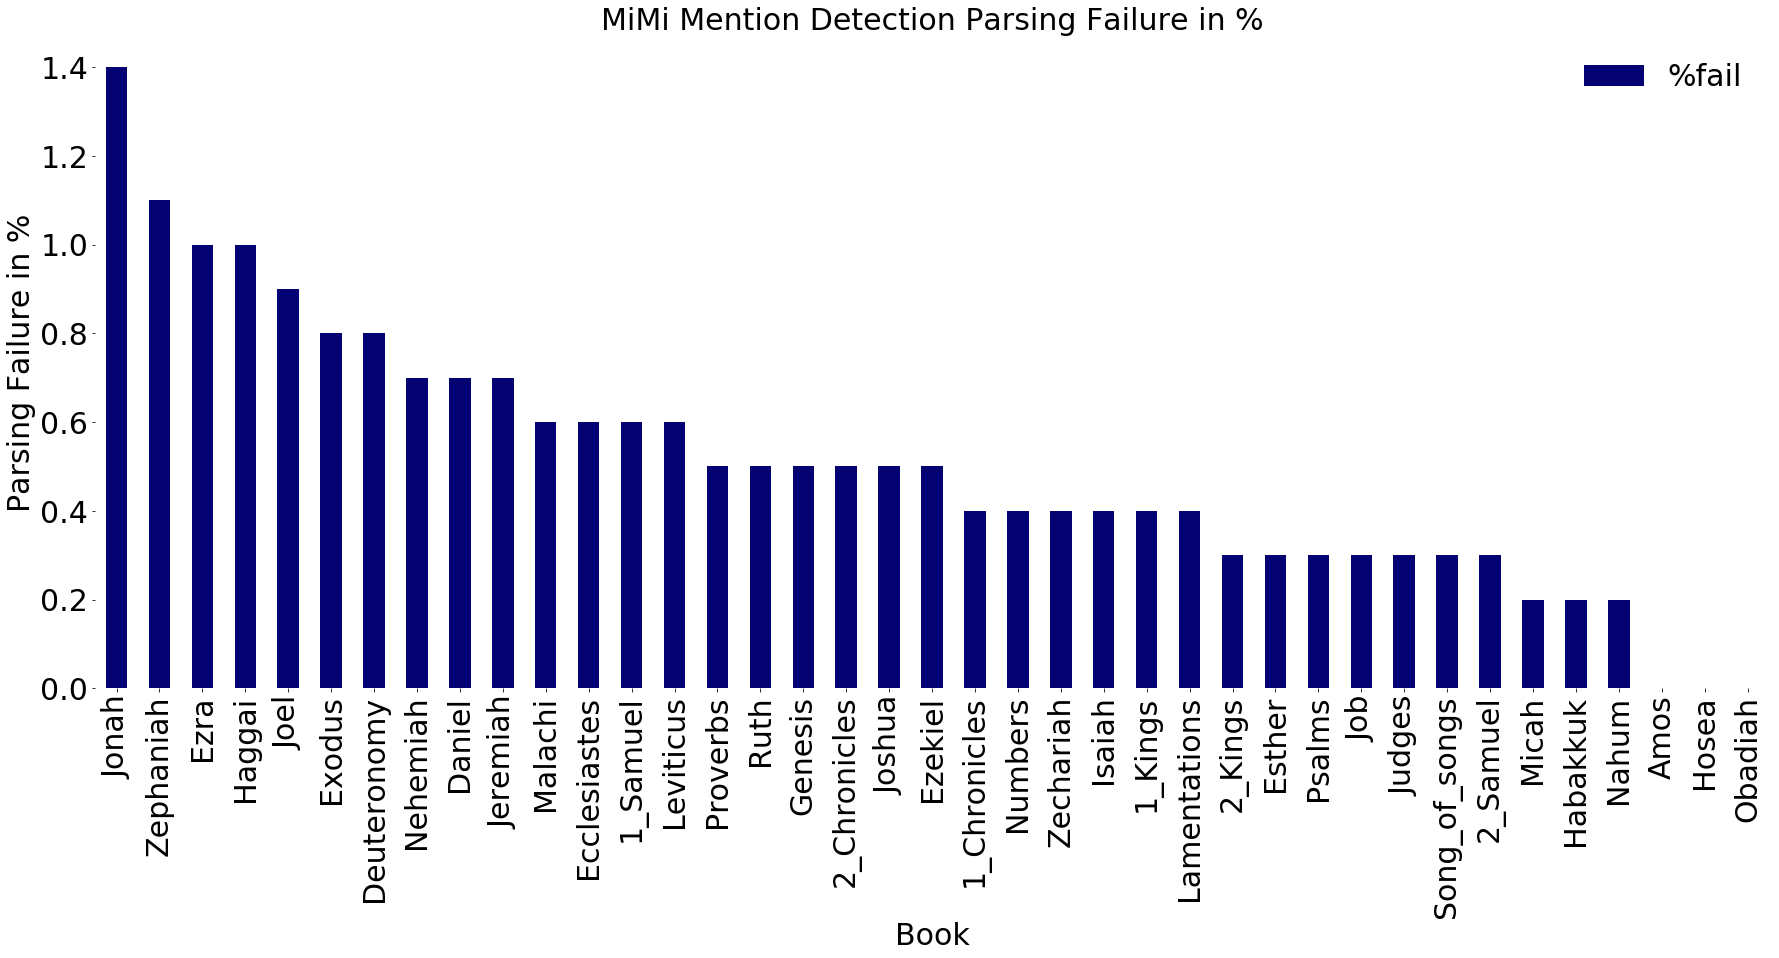

In [16]:
def PlotMentionDf(mention_stats_df):

    mention_stats_sort = mention_stats_df.sort_values(by=['%fail'], ascending=False)
    
    mention_stats_sort.plot(x='book', y='%fail', kind='bar', 
                            color='xkcd:deep blue', 
                            figsize=(30,12),
                            fontsize=30
                           )
    
    plt.title(('MiMi Mention Detection Parsing Failure in %'), fontsize=30)
    plt.xlabel('Book', fontsize=30)
    plt.ylabel('Parsing Failure in %', fontsize=30)
    plt.box(False)
    plt.legend(frameon=False, fontsize=30)
    plt.show()
    
PlotMentionDf(mention_stats_df)

In [9]:
mention_stats_df

,book,phrase atoms,success,failure,%success,%fail
0,Genesis,15591,15510,81,99.5,0.5
1,Exodus,11715,11622,93,99.2,0.8
2,Leviticus,8485,8431,54,99.4,0.6
3,Numbers,11048,11004,44,99.6,0.4
4,Deuteronomy,11102,11010,92,99.2,0.8
5,Joshua,6549,6519,30,99.5,0.5
6,Judges,7201,7179,22,99.7,0.3
7,1_Samuel,10003,9943,60,99.4,0.6
8,2_Samuel,8189,8167,22,99.7,0.3
9,1_Kings,9503,9463,40,99.6,0.4


In [13]:
ExportToLatex(OUTPUT_LOC, 'mention_stats_hb', mention_stats_df, indx = False)

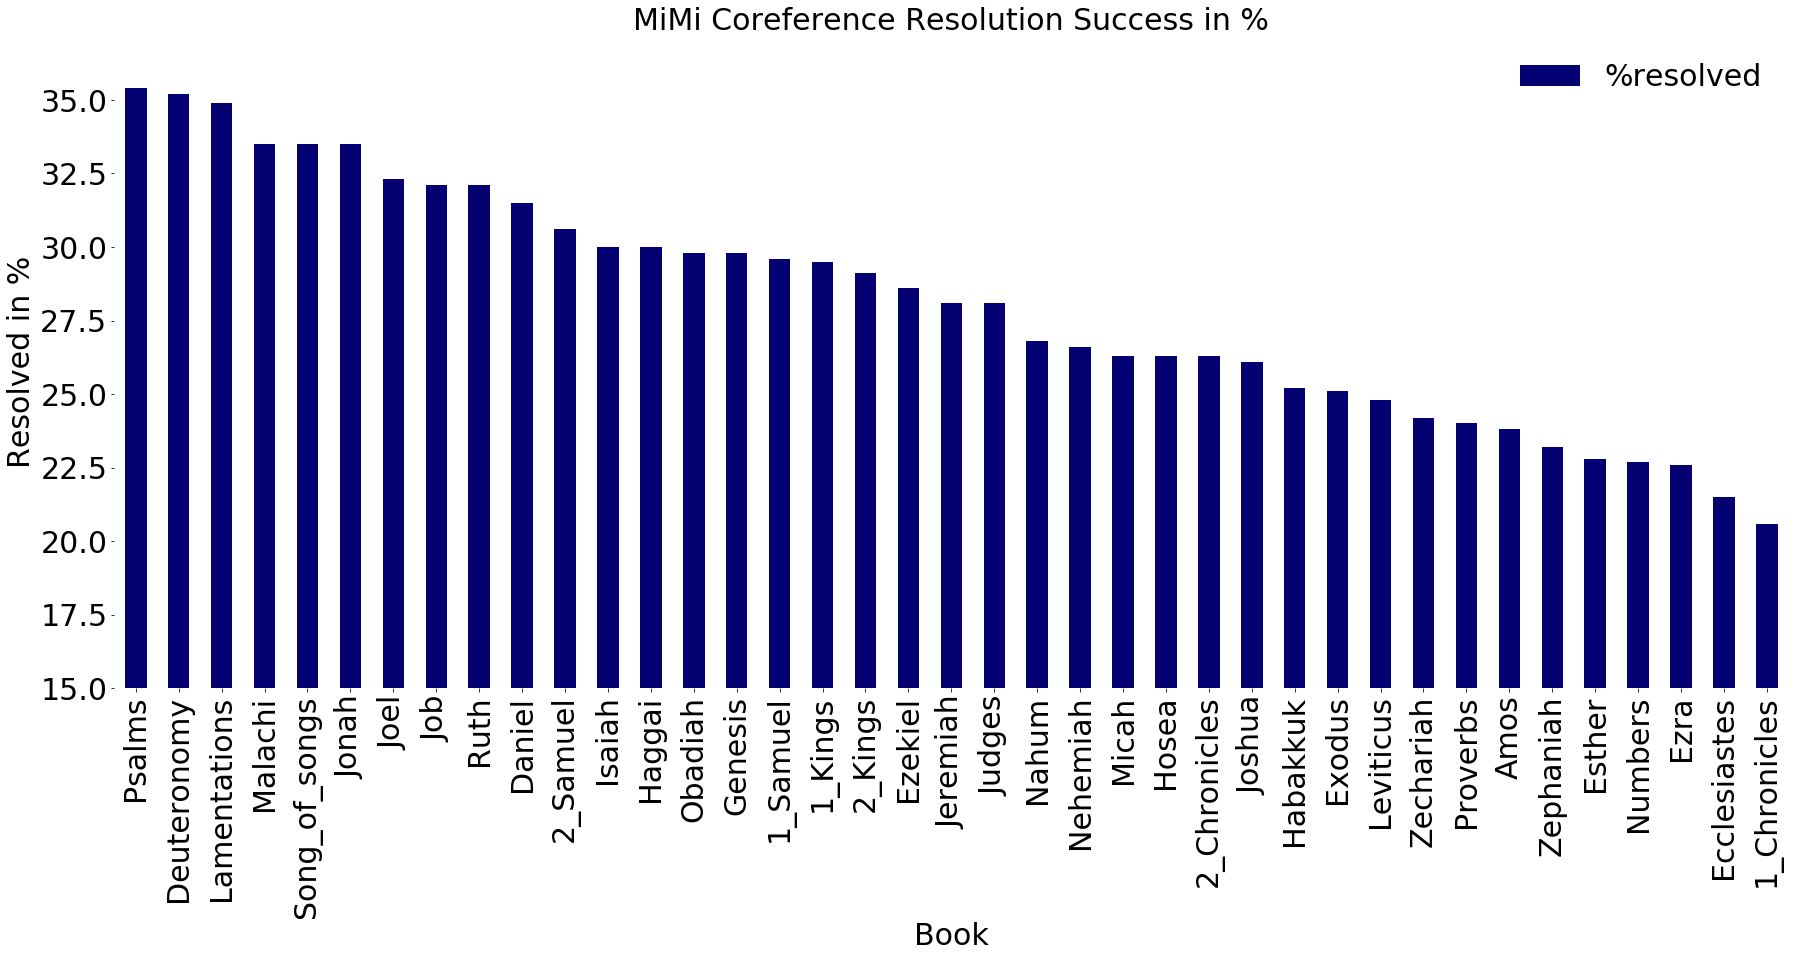

In [17]:
def PlotCoreferenceDf(coref_stats_df):

    coref_stats_sort = coref_stats_df.sort_values(by=['%resolved'], ascending=False)
    
    coref_stats_sort.plot(x='book', y='%resolved', kind='bar', color='xkcd:deep blue', 
                  figsize=(30,12),
                  fontsize=30, 
                 )

    plt.title(('MiMi Coreference Resolution Success in %'), fontsize=30)
    plt.xlabel('Book', fontsize=30)
    plt.ylabel('Resolved in %', fontsize=30)
    plt.box(False)
    plt.legend(frameon=False, fontsize=30)
    plt.ylim(ymin=15)
    plt.show()
    
PlotCoreferenceDf(coref_stats_df)

In [11]:
coref_stats_df

,book,input corefs,resolved,unresolved,%resolved,%unresolved
0,Genesis,15554,4635,10919,29.8,70.2
1,Exodus,11767,2951,8816,25.1,74.9
2,Leviticus,8601,2131,6470,24.8,75.2
3,Numbers,11102,2516,8586,22.7,77.3
4,Deuteronomy,11088,3901,7187,35.2,64.8
5,Joshua,6652,1733,4919,26.1,73.9
6,Judges,7228,2034,5194,28.1,71.9
7,1_Samuel,9950,2942,7008,29.6,70.4
8,2_Samuel,8196,2508,5688,30.6,69.4
9,1_Kings,9529,2811,6718,29.5,70.5


In [14]:
ExportToLatex(OUTPUT_LOC, 'coref_stats_hb', coref_stats_df, indx = False)

In [12]:
sieve_stats_df

,book,predicate sieve,pronoun sieve,vocative sieve,apposition sieve,fronted element sieve,total sieves
0,Genesis,3246,996,63,300,30,4635
1,Exodus,2261,548,13,116,13,2951
2,Leviticus,1541,501,0,63,26,2131
3,Numbers,1845,393,18,243,17,2516
4,Deuteronomy,1945,1591,17,336,12,3901
5,Joshua,1212,316,6,188,11,1733
6,Judges,1651,234,21,124,4,2034
7,1_Samuel,2225,527,33,155,2,2942
8,2_Samuel,1726,442,46,289,5,2508
9,1_Kings,1907,466,43,374,21,2811


In [15]:
ExportToLatex(OUTPUT_LOC, 'sieve_stats_hb', sieve_stats_df, indx = False)